In [16]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableUnCLIPImg2ImgPipeline, DDIMScheduler
import time

start_time = time.time()
#Start the StableUnCLIP Image variations pipeline
pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16, variation="fp16"
)
# pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config, rescale_betas_zero_snr=True, timestep_spacing="trailing")
pipe = pipe.to("cuda")
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Model Loading time: {elapsed_time}")

Keyword arguments {'variation': 'fp16'} are not expected by StableUnCLIPImg2ImgPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]


Model Loading time: 9.052284955978394


In [53]:
# torch.cuda.empty_cache()
# pipe.scheduler

In [54]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config, rescale_betas_zero_snr=True, timestep_spacing="trailing")
# pipe.scheduler

In [19]:
from torchvision import datasets, transforms
from torchvision.transforms import transforms

s = 1
size = 128
color_jitter = transforms.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)
transform_list = [
    transforms.Resize(size=(size,size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
]
transform = transforms.Compose(transform_list)

imagenet_dataset = datasets.ImageNet("/scratch/ssd004/datasets/imagenet256", split="train",transform = transform)

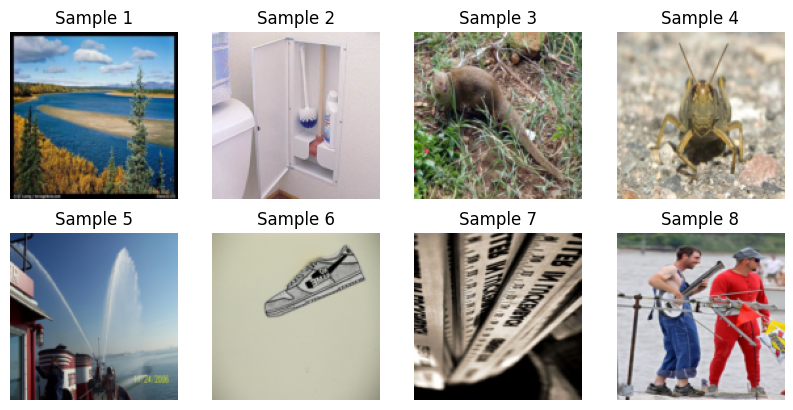

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import time

# Create a data loader
batch_size = 8
data_loader = DataLoader(imagenet_dataset, batch_size=batch_size, shuffle=True)

plt.figure(figsize=(10, 10))

# Visualize 10 samples
batch, label = next(iter(data_loader))
for i in range(batch_size):
    plt.subplot(4, 4, i+1)
    plt.imshow(np.transpose(batch[i], (1, 2, 0)))  # Assuming grayscale images
    plt.title(f'Sample {i+1}')
    plt.axis('off')
plt.show()

In [40]:
def sample_with_unclip(batch, guidance_rescale=None, num_inference_steps=None):
    transform_1 = transforms.ToPILImage()
    transform_2 = transforms.ToTensor()
    
    synth_images = []
    sum_time = 0
    for i in range(batch_size):
        init_image = transform_1(batch[i])
        
        start_time = time.time()
        if guidance_rescale is not None and num_inference_steps is not None:
            images = pipe(init_image, guidance_scale=guidance_rescale, num_inference_steps=num_inference_steps).images[0]
        elif guidance_rescale is not None:
            images = pipe(init_image, guidance_scale=guidance_rescale).images[0]
        elif num_inference_steps is not None:
            images = pipe(init_image, num_inference_steps=num_inference_steps).images[0]
        else:
            images = pipe(init_image).images[0]
        end_time = time.time()
        
        synth_image = transform_2(images.resize((128, 128)))    
        synth_images.append(synth_image)
        
        
        elapsed_time = end_time - start_time
        sum_time += elapsed_time
        print(f"Sampling time: {elapsed_time}")
    print(f"Total sampling time for {batch_size} images: {sum_time}")
    synth_images = torch.stack(synth_images)
    return synth_images

In [43]:
def plot_images(images):
    plt.figure(figsize=(9, 9))
    
    # Visualize 10 samples
    for i in range(batch_size):
        plt.subplot(4, 4, i+1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title(f'Sample {i+1}')
        plt.axis('off')
    plt.show()

In [28]:
import gc
torch.cuda.empty_cache()
gc.collect()

1981

In [29]:
synth_images_1 = sample_with_unclip(batch)

100%|██████████| 20/20 [00:07<00:00,  2.81it/s]


Sampling time: 7.769820690155029


100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Sampling time: 7.728574752807617


100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


Sampling time: 7.8312108516693115


100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


Sampling time: 7.87030291557312


100%|██████████| 20/20 [00:07<00:00,  2.74it/s]


Sampling time: 7.869393825531006


100%|██████████| 20/20 [00:07<00:00,  2.71it/s]


Sampling time: 7.955021381378174


100%|██████████| 20/20 [00:07<00:00,  2.70it/s]


Sampling time: 8.050431489944458


100%|██████████| 20/20 [00:07<00:00,  2.69it/s]


Sampling time: 8.062259674072266
Total sampling time for 8 images: 63.13701558113098


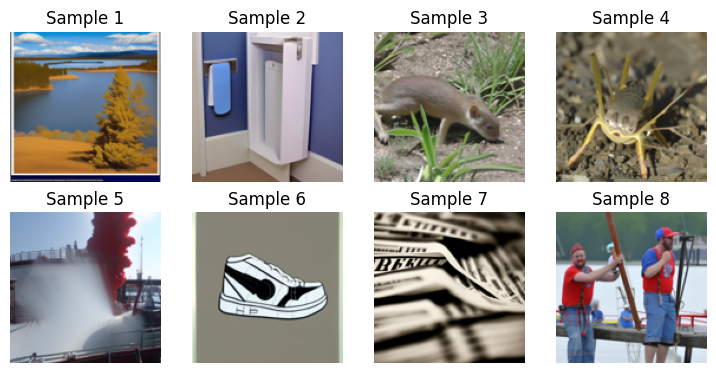

In [44]:
plot_images(synth_images_1)

In [37]:
synth_images_2 = sample_with_unclip(batch, guidance_rescale=0.5)

100%|██████████| 20/20 [00:03<00:00,  5.41it/s]


Sampling time: 4.266871929168701


100%|██████████| 20/20 [00:03<00:00,  5.42it/s]


Sampling time: 4.284255743026733


100%|██████████| 20/20 [00:03<00:00,  5.40it/s]


Sampling time: 4.284817934036255


100%|██████████| 20/20 [00:03<00:00,  5.42it/s]


Sampling time: 4.246118783950806


100%|██████████| 20/20 [00:03<00:00,  5.39it/s]


Sampling time: 4.2524354457855225


100%|██████████| 20/20 [00:03<00:00,  5.37it/s]


Sampling time: 4.28356409072876


100%|██████████| 20/20 [00:03<00:00,  5.32it/s]


Sampling time: 4.33309006690979


100%|██████████| 20/20 [00:03<00:00,  5.32it/s]


Sampling time: 4.336731910705566
Total sampling time for 8 images: 34.287885904312134


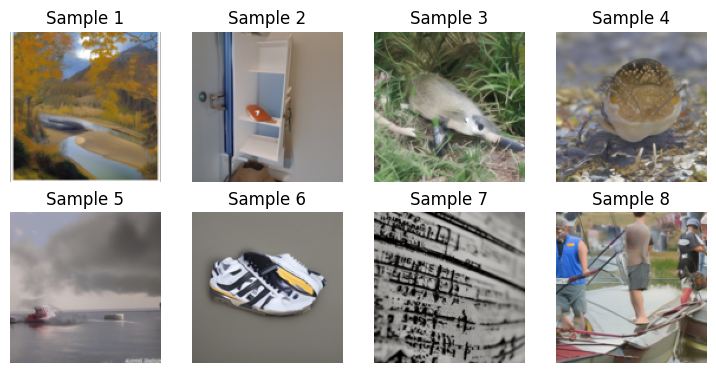

In [45]:
plot_images(synth_images_2)

In [47]:
synth_images_3 = sample_with_unclip(batch, num_inference_steps=10)

100%|██████████| 10/10 [00:03<00:00,  2.76it/s]


Sampling time: 4.309997081756592


100%|██████████| 10/10 [00:03<00:00,  2.77it/s]


Sampling time: 4.2487897872924805


100%|██████████| 10/10 [00:03<00:00,  2.77it/s]


Sampling time: 4.233454704284668


100%|██████████| 10/10 [00:03<00:00,  2.75it/s]


Sampling time: 4.2592761516571045


100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


Sampling time: 4.233543157577515


100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


Sampling time: 4.289062261581421


100%|██████████| 10/10 [00:03<00:00,  2.70it/s]


Sampling time: 4.328322649002075


100%|██████████| 10/10 [00:03<00:00,  2.70it/s]


Sampling time: 4.293442487716675
Total sampling time for 8 images: 34.19588828086853


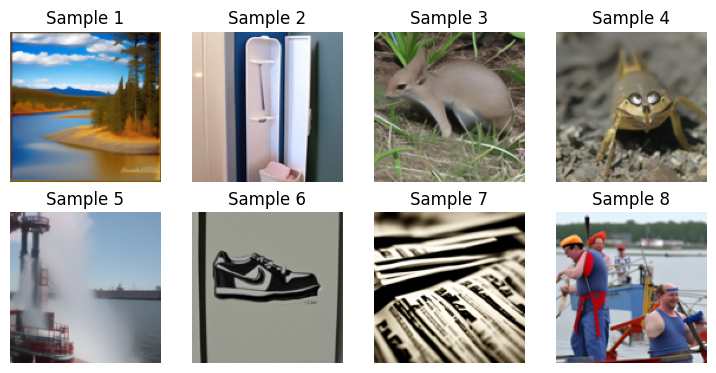

In [48]:
plot_images(synth_images_3)

In [51]:
synth_images_4 = sample_with_unclip(batch, guidance_rescale=0.5, num_inference_steps=15)

100%|██████████| 15/15 [00:02<00:00,  5.48it/s]


Sampling time: 3.3125545978546143


100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


Sampling time: 3.295024871826172


100%|██████████| 15/15 [00:02<00:00,  5.50it/s]


Sampling time: 3.307307243347168


100%|██████████| 15/15 [00:02<00:00,  5.42it/s]


Sampling time: 3.3483388423919678


100%|██████████| 15/15 [00:02<00:00,  5.42it/s]


Sampling time: 3.339325189590454


100%|██████████| 15/15 [00:02<00:00,  5.39it/s]


Sampling time: 3.3566737174987793


100%|██████████| 15/15 [00:02<00:00,  5.30it/s]


Sampling time: 3.4521238803863525


100%|██████████| 15/15 [00:02<00:00,  5.34it/s]


Sampling time: 3.449821710586548
Total sampling time for 8 images: 26.861170053482056


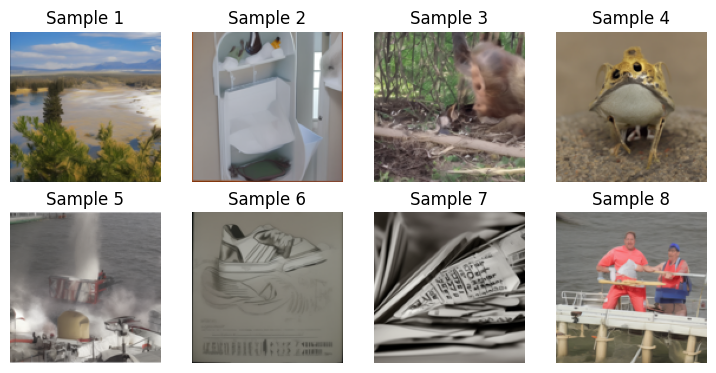

In [52]:
plot_images(synth_images_4)